# Dataset Titanic

- **Participantes do grupo**:
____________________


- Fonte do dataset: https://github.com/Geoyi/Cleaning-Titanic-Data

Total de passageiros originalmente: 1327<br>
Registros no dataset: 1310

#### Descrição dos campos


- pclass: classe do passageiro (1 = primeira; 2 = segunda; 3 = terceira)
- survived: sobreviveu (0 = não; 1 = sim)
- name: nome
- sex: sexo
- age: idade
- sibsp: número de irmãos/cônjuges à bordo
- parch: número de pais/crianças à bordo
- ticket: número do ticket
- fare: tarifa paga
- cabin: número da cabine
- embarked: porto em que embarcou (C = Cherbourg; Q = Queenstown; S = Southampton)
- boat: bote de resgate (caso sobreviveu)
- body: identificação do corpo (caso não sobreviveu e o corpo foi recuperado)
- home.dest: origem/destino

____________________________

* **Não esqueça: comente o seu código e descreva as conclusões que alcançou. Torne o notebook interessante para o leitor.**

In [64]:
#Ponto de Montagem apartir do GoogleDrive

from google.colab import drive   

drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [65]:
import pandas as pd

import seaborn as sns



import matplotlib.pyplot as plt



In [66]:
#Carregando o DataSet Especificando Separador ","   DF = titanic_original.csv

df = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/titanic_original.csv", sep=',')

In [67]:
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [69]:
#Notei que o arquivo CSV possui a ultima linha sem respostas então vou remover esta linha antes de iniciar 
#Removendo linha em branco do DF
df = df.drop(1309)

In [70]:
df.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1.0,1.0,"Anderson, Mr. Harry",male,48.0000,0.0,0.0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1.0,1.0,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1.0,0.0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1.0,0.0,"Andrews, Mr. Thomas Jr",male,39.0000,0.0,0.0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1.0,1.0,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2.0,0.0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1.0,0.0,"Artagaveytia, Mr. Ramon",male,71.0000,0.0,0.0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [71]:
df.tail(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1299,3.0,0.0,"Yasbeck, Mr. Antoni",male,27.0,1.0,0.0,2659,14.4542,NaN,C,C,NaN,NaN
1300,3.0,1.0,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0,1.0,0.0,2659,14.4542,NaN,C,NaN,NaN,NaN
1301,3.0,0.0,"Youseff, Mr. Gerious",male,45.5,0.0,0.0,2628,7.2250,NaN,C,NaN,312.0,NaN
1302,3.0,0.0,"Yousif, Mr. Wazli",male,NaN,0.0,0.0,2647,7.2250,NaN,C,NaN,NaN,NaN
1303,3.0,0.0,"Yousseff, Mr. Gerious",male,NaN,0.0,0.0,2627,14.4583,NaN,C,NaN,NaN,NaN
1304,3.0,0.0,"Zabour, Miss. Hileni",female,14.5,1.0,0.0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [72]:
# Tamanho do df
df.shape   


(1309, 14)

In [73]:
type(df)

pandas.core.frame.DataFrame

In [74]:
#Linhas do df
len(df)

1309

In [75]:
#Colunas do df

len(df.columns)

14

In [76]:
#Numero de elementos no df
df.size

18326

In [77]:
#Contagem de valores em branco;

contagem_valores_faltantes = df.isnull().sum()

contagem_valores_faltantes

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

# Mapeando variável de **sobreviventes**

In [135]:
#Mapeamento de variáveis
survived_map = {True : 1.0, False : 0.0}

In [136]:
#Aplicar o mapeamento
df['survived'] = df['survived'].map(survived_map)

In [144]:
#Separando sobreviventes e mortos
num_true = len(df.loc[df['survived'] == True])
num_false = len(df.loc[df['survived'] == False])


In [146]:
print(num_true)

print(num_false)

809
500


In [143]:
# Porcentagem de sobreviventes / ou não :( 
print("Número de sobreviventes: {0} ({1:2.2f}%) ".format(num_true, (num_true/ (num_true + num_false)) * 100))
print("Número de NÃO sobreviventes: {0} ({1:2.2f}%) ".format(num_false, (num_false/ (num_true + num_false)) * 100))

Número de sobreviventes: 809 (61.80%) 
Número de NÃO sobreviventes: 500 (38.20%) 


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


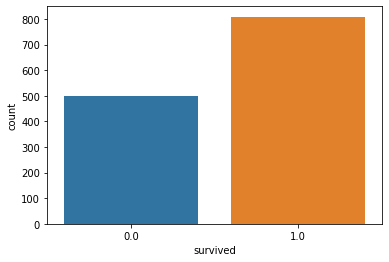

In [140]:
#sobreviveu (0.0 = não; 1.0 = sim)'
sns.countplot(df['survived'])




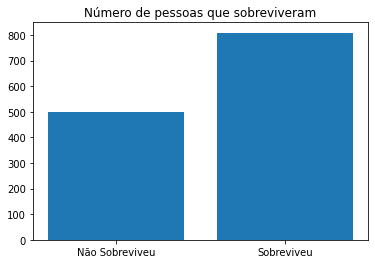

In [141]:
saida = ['Não Sobreviveu', 'Sobreviveu']
numeros = [500,809]

plt.bar(saida, numeros)
plt.title('Número de pessoas que sobreviveram')
plt.show()

Como notamos nos graficos 809 Pessoas sobreviveram x **500** **não** **sobreviveram**

# Homens X Mulheres á bordo

In [85]:
#Separando Homens e Mulheres
num_male = len(df.loc[df['sex'] == 'male'])
num_female = len(df.loc[df['sex'] == 'female'])


In [86]:
print("Número de Homens á bordo: {0} ({1:2.2f}%) ".format(num_male, (num_male/ (num_male + num_female)) * 100))
print("Número de Mulheres á bordo: {0} ({1:2.2f}%) ".format(num_female, (num_female/ (num_male + num_female)) * 100))

Número de Homens á bordo: 843 (64.40%) 
Número de Mulheres á bordo: 466 (35.60%) 


In [190]:
women = df.loc[df.sex == 'female']['survived']
rate_women = sum(women)/ len(women)

men = df.loc[df.sex == 'male']['survived']
rate_men = sum(men)/ len(men)

print(round(rate_men, 3)*100, '% de Homens sobreviveram')
print(round(rate_women, 2)*100, '% de mulheres sobreviveram')

#print(rate_men)


80.9 % de Homens sobreviveram
27.0 % de mulheres sobreviveram


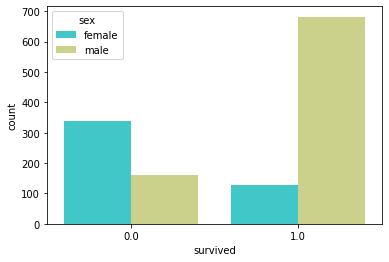

In [151]:
sns.countplot(x='survived',hue='sex',data=df,palette='rainbow')  #Comparativos de sobreviventes entre homens e mulheres

#  sobreviveu (0.0 = não; 1.0 = sim)

# Numero de pessoas por Ponto de Embarque

In [88]:
df.embarked.value_counts() #Contagem de repetições para cada item 

S    914
C    270
Q    123
Name: embarked, dtype: int64

In [89]:
# Embarques embarked: porto em que embarcou (C = Cherbourg; Q = Queenstown; S = Southampton)

num_embarked_in_Cherbourg = len(df.loc[df['embarked'] == 'C'])

num_embarked_in_Queestown = len(df.loc[df['embarked'] == 'Q'])

num_embarked_in_Southampton = len(df.loc[df['embarked'] == 'S'])


In [90]:
print("Número de Pessoas que embarcaram em Cherbourg: {0} ({1:2.2f}%) ".format(num_embarked_in_Cherbourg, (num_embarked_in_Cherbourg/ (num_embarked_in_Cherbourg + num_embarked_in_Queestown + num_embarked_in_Southampton)) * 100))

print("Número de Pessoas que embarcaram em Queestown: {0} ({1:2.2f}%) ".format(num_embarked_in_Queestown, (num_embarked_in_Queestown/ (num_embarked_in_Queestown + num_embarked_in_Cherbourg + num_embarked_in_Southampton)) * 100))

print("Número de Pessoas que embarcaram em Southampton: {0} ({1:2.2f}%) ".format(num_embarked_in_Southampton, (num_embarked_in_Southampton/ (num_embarked_in_Southampton + num_embarked_in_Queestown + num_embarked_in_Cherbourg)) * 100))

Número de Pessoas que embarcaram em Cherbourg: 270 (20.66%) 
Número de Pessoas que embarcaram em Queestown: 123 (9.41%) 
Número de Pessoas que embarcaram em Southampton: 914 (69.93%) 


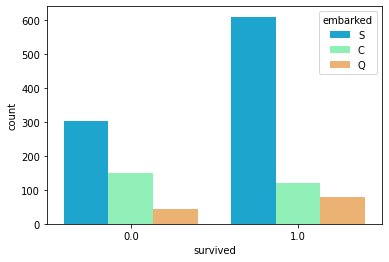

In [91]:
#  sobreviveu (0.0 = não; 1.0 = sim)

sns.countplot(x='survived',hue='embarked',data=df,palette='rainbow') #Plota numero de sobreviventes por local de embarque

# Numero de pessoas por Classe 

In [92]:
df.pclass.value_counts()

3.0    709
1.0    323
2.0    277
Name: pclass, dtype: int64

In [93]:
#convertendo a coluna pclass para str/objeto

pclass = df['pclass'].astype(str)

In [94]:

# #pclass: classe do passageiro (1.0 = primeira; 2.0 = segunda; 3.0 = terceira)

num_class_a = len(pclass.loc[pclass == '1.0'])

num_class_b = len(pclass.loc[pclass == '2.0'])

num_class_c = len(pclass.loc[pclass == '3.0'])


print(num_class_a)
print(num_class_b)
print(num_class_c)


323
277
709


In [95]:
print("Número de Pessoas na Primeira Classe: {0} ({1:2.2f}%) ".format(num_class_a, (num_class_a/ (num_class_a + num_class_b + num_class_c)) * 100))

print("Número de Pessoas na Segunda Classe: {0} ({1:2.2f}%) ".format(num_class_b, (num_class_b/ (num_class_b + num_class_a + num_class_c)) * 100))

print("Número de Pessoas na Terceira Classe: {0} ({1:2.2f}%) ".format(num_class_c, (num_class_c/ (num_class_c + num_class_b + num_class_a)) * 100))

Número de Pessoas na Primeira Classe: 323 (24.68%) 
Número de Pessoas na Segunda Classe: 277 (21.16%) 
Número de Pessoas na Terceira Classe: 709 (54.16%) 


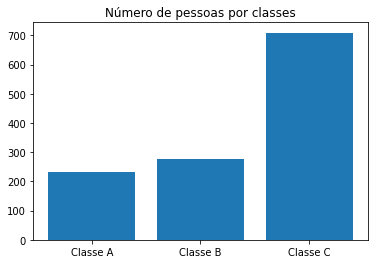

In [96]:
classes = ['Classe A', 'Classe B', 'Classe C']  #plota numero de pessoas por classes
valores = [232, 277, 709]

plt.bar(classes, valores)
plt.title('Número de pessoas por classes')
plt.show()

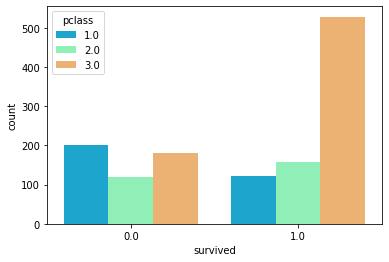

In [97]:
sns.countplot(x='survived',hue='pclass',data=df,palette='rainbow')

#pclass=(1.0 = primeira; 2.0 = segunda; 3.0 = terceira)

#survived= sobreviveu (0.0 = não; 1.0 = sim)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


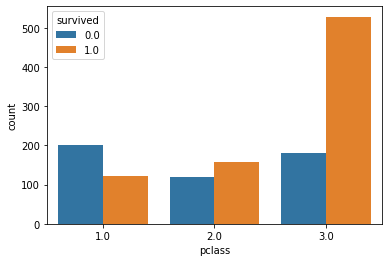

In [98]:
#df['survived'].groupby(df['pclass']).mean()

sns.countplot(df['pclass'], hue=df['survived'])



# Idades

In [99]:
df.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,0.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,0.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1.0,0.0,"Anderson, Mr. Harry",male,48.0000,0.0,0.0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1.0,0.0,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1.0,0.0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1.0,1.0,"Andrews, Mr. Thomas Jr",male,39.0000,0.0,0.0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1.0,0.0,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2.0,0.0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1.0,1.0,"Artagaveytia, Mr. Ramon",male,71.0000,0.0,0.0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [100]:
df_age = df.drop(df.columns[[0,1,2,3,5,6,7,8,9,10,11,12,13]], axis=1)  #Excluindo todas as colunas menos a "age"


print("a Media de idade das pessoas no Titanic é de :" , df_age.median()) #media das idades 

a Media de idade das pessoas no Titanic é de : age    28.0
dtype: float64


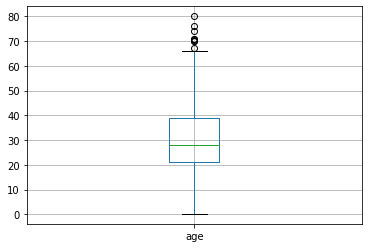

In [101]:
df_age.boxplot()              #boxplot das idades.

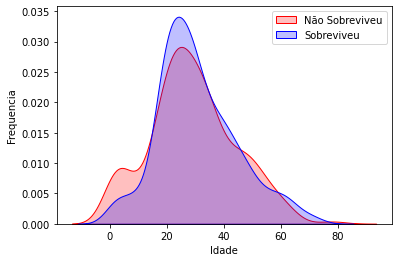

In [102]:
# Distribuição da frequencia de sobreiventes por idade



g = sns.kdeplot(df["age"][(df["survived"] == 0) & (df["age"].notnull())], color="Red", shade = True)
g = sns.kdeplot(df["age"][(df["survived"] == 1) & (df["age"].notnull())], ax =g, color="Blue", shade= True)
g.set_xlabel("Idade")
g.set_ylabel("Frequencia")
g = g.legend(["Não Sobreviveu","Sobreviveu"])

# Tratando DF para treinar modelos de predição

In [103]:
df.isna().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [104]:
#Deletando colunas que não fazem sentido na predição

df_edited = df.drop(['name', 'ticket', 'cabin', 'boat', 'body', 'home.dest'], axis=1)

df_edited.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1.0,0.0,female,29.0000,0.0,0.0,211.3375,S
1,1.0,0.0,male,0.9167,1.0,2.0,151.5500,S
2,1.0,1.0,female,2.0000,1.0,2.0,151.5500,S
3,1.0,1.0,male,30.0000,1.0,2.0,151.5500,S
4,1.0,1.0,female,25.0000,1.0,2.0,151.5500,S


In [105]:
# Delete itens que possuem valores em branco nas colunas embarked e fare

df_edited.dropna(subset=['embarked'], inplace = True)

df_edited.dropna(subset=['fare'], inplace = True)

# Fill missing age with median age
df_edited['age'].fillna(df_edited['age'].median(), inplace = True)

In [106]:
df_edited.isna().sum()

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [107]:
# Convert String Objects to categories and then convert to numbers.
for label, content in df_edited.items():
    if pd.api.types.is_string_dtype(content):
        df_edited[label] = content.astype('category').cat.as_ordered()
        df_edited[label] = pd.Categorical(content).codes

In [108]:
df_edited.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1306 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1306 non-null   float64
 1   survived  1306 non-null   float64
 2   sex       1306 non-null   int8   
 3   age       1306 non-null   float64
 4   sibsp     1306 non-null   float64
 5   parch     1306 non-null   float64
 6   fare      1306 non-null   float64
 7   embarked  1306 non-null   int8   
dtypes: float64(6), int8(2)
memory usage: 74.0 KB


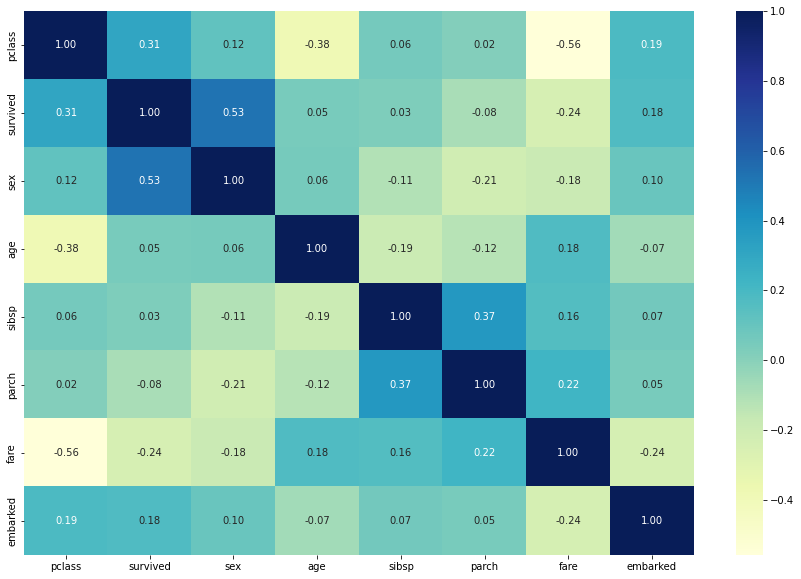

In [109]:
# Matriz de correlação 

corr_matrix = df_edited.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',
    cmap='YlGnBu'
);

In [110]:
from sklearn.model_selection import train_test_split

In [111]:
# At X = preditoras
atributos = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']

atributos

['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']

In [112]:
#At Y = Saida

atrib_prev = ['survived']

atrib_prev

['survived']

In [113]:
#Criar objetos X e Y
X = df_edited[atributos].values
Y = df_edited[atrib_prev].values

In [114]:
#Def taxa split em 30%
split_test_size = 0.30

In [115]:
#Criar os dados de treino e teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = split_test_size, random_state = 42)

print("{0:0.2f}% nos dados de treino".format((len(X_treino)/len(df.index))*100))
print("{0:0.2f}% nos dados de teste".format((len(X_teste)/len(df.index))*100))

69.82% nos dados de treino
29.95% nos dados de teste


In [116]:
#Utilizando Random Forest

from sklearn.ensemble import RandomForestClassifier
#Pct metricas para Virificar Exatidao treino (Acuracia)
from sklearn import metrics

In [117]:
modelo_v1 = RandomForestClassifier(random_state=42)
modelo_v1.fit(X_treino, Y_treino.ravel())


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [118]:
rf_predict_train = modelo_v1.predict(X_treino)
print("Exatidão Treino (acuracia):  {0:.4f})".format(metrics.accuracy_score(Y_treino, rf_predict_train)))

rf_predict_test = modelo_v1.predict(X_teste)
print("Exatidão Teste (acuracia):  {0:.4f})".format(metrics.accuracy_score(Y_teste, rf_predict_test)))

Exatidão Treino (acuracia):  0.9737)
Exatidão Teste (acuracia):  0.7908)


In [119]:
df_edited


,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1.0,0.0,0,29.0000,0.0,0.0,211.3375,2
1,1.0,0.0,1,0.9167,1.0,2.0,151.5500,2
2,1.0,1.0,0,2.0000,1.0,2.0,151.5500,2
3,1.0,1.0,1,30.0000,1.0,2.0,151.5500,2
4,1.0,1.0,0,25.0000,1.0,2.0,151.5500,2
...,...,...,...,...,...,...,...,...
1304,3.0,1.0,0,14.5000,1.0,0.0,14.4542,0
1305,3.0,1.0,0,28.0000,1.0,0.0,14.4542,0
1306,3.0,1.0,1,26.5000,0.0,0.0,7.2250,0
1307,3.0,1.0,1,27.0000,0.0,0.0,7.2250,0


In [123]:
#Testar modelo 

nova_pessoa = modelo_v1.predict(X_teste[2].reshape(1, -1))

nova_pessoa


array([1.])